In [1]:
import cmath

import matplotlib.pyplot as plt
import numpy as np

## The starting squaring functions and the iterations

In [8]:
def s(z, c):
    return z**2 + c

def is_conv(z, c, max_iter=500, limit=2):
    iter = 0
    vals = [z]
    while abs(z) < limit and iter < max_iter:
        z = s(z, c)
        vals.append(z)
        iter += 1
    conv = abs(z) < limit
    return conv, iter, vals

def split_complex(zs):
    xs = [z.real for z in zs]
    ys = [z.imag for z in zs]
    return xs, ys

In [9]:
def plot_iterations(vals):
    x, y = split_complex(vals)
    fig, ax = plt.subplots(figsize=(6,6))
    ax.plot(x, y)
    ax.scatter(x, y, color='red')
    ax.set_aspect('equal')
    ax.grid(True, which='both')

    # set the x-spine (see below for more info on `set_position`)
    ax.spines['left'].set_position('zero')

    # turn off the right spine/ticks
    ax.spines['right'].set_color('none')
    ax.yaxis.tick_left()

    # set the y-spine
    ax.spines['bottom'].set_position('zero')

    # turn off the top spine/ticks
    ax.spines['top'].set_color('none')
    ax.xaxis.tick_bottom()

    ax.set_ylim(-3, 3)
    ax.set_xlim(-3, 3)

    plt.show()

Convolves? - True | iters - 500


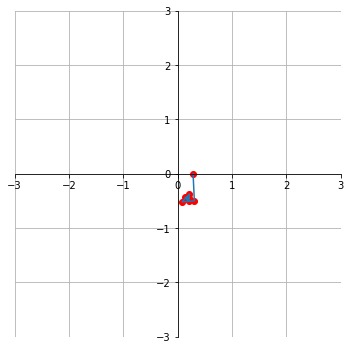

In [10]:
z = 0.285
c = 0.285 - 0.5j
conv, iter, vals = is_conv(z, c)
print(f'Convolves? - {conv} | iters - {iter}')
plot_iterations(vals)

## Julia Sets

In [11]:
def julia_set(c, limits_x=(-2, 2), limits_y=(-2, 2), dx=0.0, dy=0.05):
    y, x = np.mgrid[slice(limits_y[0], limits_y[1] + dy, dy),
                    slice(limits_x[0], limits_x[1] + dx, dx)]
    Z = x*0 + 500

    for i in range(len(x[0])):
        for j in range(len(y)):
            x_v = x[0, i]
            y_v = y[j, 0]
            conv, iter, vals = is_conv(complex(x_v, y_v), c)
            if not conv:
                Z[j, i] = iter
    fig, ax = plt.subplots(figsize=(10, 10))
    plt.imshow(Z)

In [12]:
def manderbolt_set(limits_x=(-2, 2), limits_y=(-2, 2), dx=0.05, dy=0.05):
    y, x = np.mgrid[slice(limits_y[0], limits_y[1] + dy, dy),
                    slice(limits_x[0], limits_x[1] + dx, dx)]
    C = x*0 + 500

    for i in range(len(x[0])):
        for j in range(len(y)):
            x_v = x[0, i]
            y_v = y[j, 0]
            conv, iter, vals = is_conv(0, complex(x_v, y_v))
            if not conv:
                C[j, i] = iter
    C = 500-C
    fig, ax = plt.subplots(figsize=(10, 10))
    plt.imshow(C)

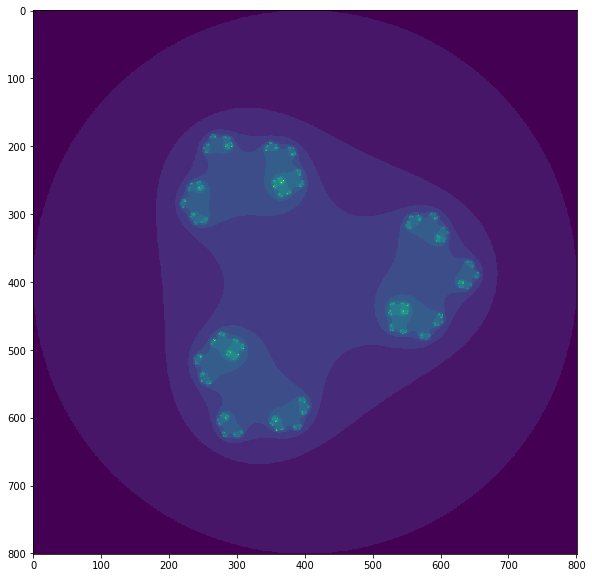

In [13]:
julia_set(-0.8269 + 0.1889j, dx=0.005, dy=0.005)

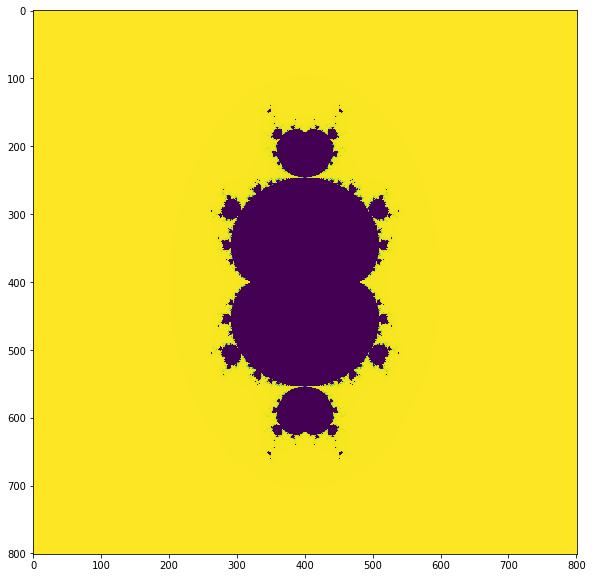

In [14]:
manderbolt_set(limits_x = (-2, 2), limits_y = (-2, 2), dx=0.005, dy=0.005)